## Universidade do Estado do Amazonas
### Disciplina: Redes Neurais Artificiais 2025/1
### Integrantes: 
> Emanuelle Marreira - 2215080035

> Afonso Garcia - 1615080003

> Italo Ferreira - 2215080012

> João Carvalho - 2215080040 

## Identificador

In [2]:
identificador = (5+3+2+0)%4
print(identificador)

2


## Bibliotecas

In [3]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.set_printoptions(precision=4, suppress=True)

## Definição do Neurônio Perceptron

In [4]:
class NeuronioPerceptron:
    def __init__(self, taxa_de_aprendizado = 0.1, n_features = 2, vies = -1):
        self.taxa_de_aprendizado = taxa_de_aprendizado
        self.n_features = n_features
        self.pesos_iniciais = np.random.uniform(-0.5, 0.5, size = self.n_features + 1)
        #self.pesos_iniciais = [-0.5441, 0.5562, -0.4074]
        self.pesos = self.pesos_iniciais.copy()
        self.epocas = 0
        self.total_ajustes_pesos = 0
        self.vies = vies

    def ativacao(self, theta):
        return np.where(theta >= 0, 1, 0)

    def prever(self, X_com_vies):
        entrada = np.dot(X_com_vies, self.pesos)
        print(f"{X_com_vies} * {self.pesos} = {np.round(entrada, 4)}")
        return self.ativacao(entrada)
    
    def realizar_ajuste(self, erro, xi):
        self.pesos = self.pesos + self.taxa_de_aprendizado * erro * xi
        self.total_ajustes_pesos += 1

    def treino(self, X_treino, y_treino):
        print(f"Pesos iniciais (w0, w1, w2): {self.pesos_iniciais}")
        X_treino_vies = np.insert(X_treino, 0, self.vies, axis = 1)

        convergiu = False
        while not convergiu:
            self.epocas += 1
            print(f"\n**********{self.epocas}a época**********\n")
            erros_na_epoca = 0
            ocorreu_erro = False

            for xi, yd in zip(X_treino_vies, y_treino):
                y_previsto = self.prever(xi)
                erro = yd - y_previsto

                if erro != 0:
                    print(f"!!!ERRO em: {xi} | {yd} - {y_previsto} = {erro}")
                    self.realizar_ajuste(erro, xi)
                    erros_na_epoca += 1
                    ocorreu_erro = True
            
            if not ocorreu_erro:
                convergiu = True
        print(f"\nConvergência alcançada!")
        print(f"Pesos finais: {self.pesos}")
        return self


In [5]:
# Teste com o exemplo da professora
X = [(2,2),(4,4)]
Y = [1,0]
neuronio_perceptron = NeuronioPerceptron(taxa_de_aprendizado = 0.1, n_features = 2)
neuronio_perceptron.treino(X, Y)
print(f"Número total de ajustes nos pesos: {neuronio_perceptron.total_ajustes_pesos}")
print(f"Número de épocas até a convergência: {neuronio_perceptron.epocas}")

Pesos iniciais (w0, w1, w2): [0.0914 0.4078 0.1353]

**********1a época**********

[-1  2  2] * [0.0914 0.4078 0.1353] = 0.9948
[-1  4  4] * [0.0914 0.4078 0.1353] = 2.081
!!!ERRO em: [-1  4  4] | 0 - 1 = -1

**********2a época**********

[-1  2  2] * [ 0.1914  0.0078 -0.2647] = -0.7052
!!!ERRO em: [-1  2  2] | 1 - 0 = 1
[-1  4  4] * [ 0.0914  0.2078 -0.0647] = 0.481
!!!ERRO em: [-1  4  4] | 0 - 1 = -1

**********3a época**********

[-1  2  2] * [ 0.1914 -0.1922 -0.4647] = -1.5052
!!!ERRO em: [-1  2  2] | 1 - 0 = 1
[-1  4  4] * [ 0.0914  0.0078 -0.2647] = -1.119

**********4a época**********

[-1  2  2] * [ 0.0914  0.0078 -0.2647] = -0.6052
!!!ERRO em: [-1  2  2] | 1 - 0 = 1
[-1  4  4] * [-0.0086  0.2078 -0.0647] = 0.581
!!!ERRO em: [-1  4  4] | 0 - 1 = -1

**********5a época**********

[-1  2  2] * [ 0.0914 -0.1922 -0.4647] = -1.4052
!!!ERRO em: [-1  2  2] | 1 - 0 = 1
[-1  4  4] * [-0.0086  0.0078 -0.2647] = -1.019

**********6a época**********

[-1  2  2] * [-0.0086  0.0078 -0.2647] 

## Parte 1 - Resolvendo um problema linearmente separável

### Definição dos dados

In [6]:
dados = np.fromfile('dataAll.txt', dtype = np.float64)
dados = dados.reshape(-1,1,3)
print(f"Dados carregados: {dados.shape}")
dados = dados.reshape(-1, 3)
X = dados[:, [0,1]]  # x1 e x2
yd = dados[:, 2]   # yd
print(f"X = {X[:5]}...")
print(f"yd = {yd[:5]}...")

Dados carregados: (1000, 1, 3)
X = [[-363.7884  244.1423]
 [ 328.7572 -256.7658]
 [-164.9827  613.2164]
 [ 536.5905  764.9575]
 [ 314.2297  343.8375]]...
yd = [0. 1. 0. 0. 0.]...


### Treinamento 

In [7]:
neuronio_perceptron = NeuronioPerceptron(taxa_de_aprendizado = 0.1, n_features = 2)
neuronio_perceptron = neuronio_perceptron.treino(X, yd)

print(f"Número total de ajustes nos pesos: {neuronio_perceptron.total_ajustes_pesos}")
print(f"Número de épocas até a convergência: {neuronio_perceptron.epocas}")

Pesos iniciais (w0, w1, w2): [0.3891 0.2136 0.025 ]

**********1a época**********

[  -1.     -363.7884  244.1423] * [0.3891 0.2136 0.025 ] = -71.9872
[  -1.      328.7572 -256.7658] * [0.3891 0.2136 0.025 ] = 63.4125
[  -1.     -164.9827  613.2164] * [0.3891 0.2136 0.025 ] = -20.3183
[ -1.     536.5905 764.9575] * [0.3891 0.2136 0.025 ] = 133.2986
!!!ERRO em: [ -1.     536.5905 764.9575] | 0.0 - 1 = -1.0
[ -1.     314.2297 343.8375] * [  0.4891 -53.4455 -76.4708] = -43088.1744
[  -1.      -87.6395 -306.9783] * [  0.4891 -53.4455 -76.4708] = 28158.3202
[  -1.     -172.0622 -500.5087] * [  0.4891 -53.4455 -76.4708] = 47469.7555
[ -1.     727.9602 358.2956] * [  0.4891 -53.4455 -76.4708] = -66305.8251
!!!ERRO em: [ -1.     727.9602 358.2956] | 1.0 - 0 = 1.0
[ -1.     752.3574 268.3682] * [  0.3891  19.3505 -40.6412] = 3651.313
[  -1.      685.6276 -833.4677] * [  0.3891  19.3505 -40.6412] = 47140.0236
[  -1.       11.5324 -588.4802] * [  0.3891  19.3505 -40.6412] = 24139.329
[  -1.     -

### Impressão dos resultados

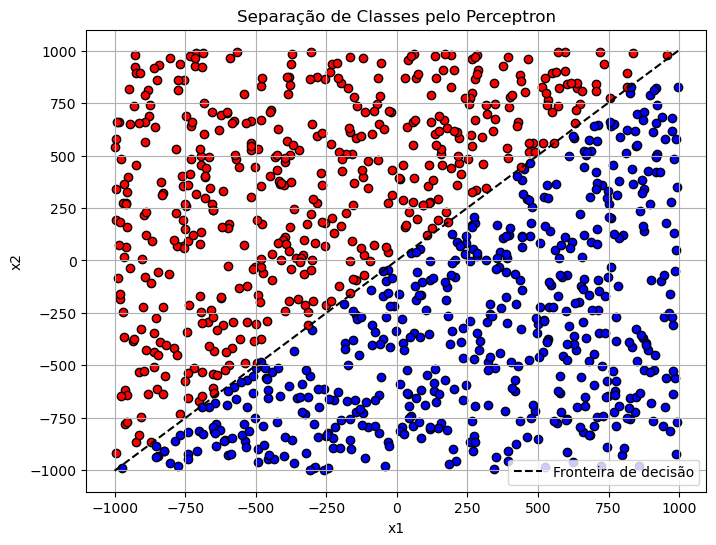

In [8]:
plt.figure(figsize=(8, 6))

for i in range(len(X)):
    cor = 'red' if yd[i] == 0 else 'blue'
    plt.scatter(X[i][0], X[i][1], c=cor, edgecolors='k')
    
w = neuronio_perceptron.pesos
x_1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)

if w[2] != 0:
    x_2 = (w[0]/w[2]) - ((w[1]/w[2]) * x_1)
    plt.plot(x_1, x_2, 'k--', label='Fronteira de decisão')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Separação de Classes pelo Perceptron')
plt.grid(True)
plt.legend()
plt.show()